# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
import random

%matplotlib inline

In [2]:
df = pd.read_excel("Churn.xlsx")
print(df.shape)
df.head()

(7043, 12)


,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,78,0,None,3,1,1,2,Month-to-Month,1,39.65,59.65,1
1,74,1,Offer E,3,1,0,1,Month-to-Month,8,80.65,1024.10,1
2,71,3,Offer D,2,0,2,1,Month-to-Month,18,95.45,1910.88,1
3,78,1,Offer C,2,2,2,1,Month-to-Month,25,98.50,2995.07,1
4,80,1,Offer C,2,0,0,1,Month-to-Month,37,76.50,3102.36,1


# One-Hot Encoding

In [3]:
df = pd.get_dummies(df, columns = ['Membership', 'Contract'])
df

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Churn Value,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,78,0,3,1,1,2,1,39.65,59.65,1,1,0,0,0,0,0,1,0,0
1,74,1,3,1,0,1,8,80.65,1024.10,1,0,0,0,0,0,1,1,0,0
2,71,3,2,0,2,1,18,95.45,1910.88,1,0,0,0,0,1,0,1,0,0
3,78,1,2,2,2,1,25,98.50,2995.07,1,0,0,0,1,0,0,1,0,0
4,80,1,2,0,0,1,37,76.50,3102.36,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,5,0,0,4,72,21.15,3039.53,0,1,0,0,0,0,0,0,0,1
7039,38,2,3,3,2,2,24,84.80,2807.47,0,0,0,0,1,0,0,0,1,0
7040,30,2,4,2,2,1,72,103.20,9453.04,0,1,0,0,0,0,0,0,1,0
7041,32,2,4,1,0,2,11,29.60,319.21,0,1,0,0,0,0,0,1,0,0


# 학습/테스트셋 분리

In [4]:
from sklearn.model_selection import train_test_split

y_target = df['Churn Value']
X_data = df.drop(['Churn Value'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=156)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 18), (1409, 18), (5634,), (1409,))

# 학습 데이터셋 정규화
sklearn 으로 데이터 스케일링을 할 경우, 훈련용 데이터셋과 테스트용 데이터셋에 각각 다른 과정이 필요합니다.

훈련용 데이터셋은 fit 메서드를 적용시킨 후 transform 해주어야 하고, 테스트용 데이터셋에는 transform 을 적용시켜주면 됩니다.

In [5]:
# Initialize variable
X_train_origin, X_test_origin, y_train_origin, y_test_origin = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Numeric Only
Numeric_column_list = []
for i in range(len(X_data.columns)):
    if X_data[X_data.columns[i]].dtype == 'float64' or X_data[X_data.columns[i]].dtype == 'int64':
            Numeric_column_list.append(X_data.columns[i])

numeric_train_data, numeric_test_data = X_train[Numeric_column_list], X_test[Numeric_column_list]

scaler = MinMaxScaler()

X_train[Numeric_column_list] = scaler.fit_transform(numeric_train_data)
X_test[Numeric_column_list] = scaler.transform(numeric_test_data)

X_train

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
1145,0.065574,0.333333,0.50,0.50,1.0,0.000000,0.380282,0.861194,0.264393,0,0,0,1,0,0,1,0,0
86,0.819672,0.000000,0.50,0.00,0.5,0.000000,0.000000,0.606468,0.006514,1,0,0,0,0,0,1,0,0
817,0.918033,0.000000,0.50,1.00,1.0,0.000000,1.000000,0.950746,0.802868,1,0,0,0,0,0,0,0,1
1767,0.557377,0.000000,0.00,0.25,0.0,0.666667,0.239437,0.311443,0.100342,1,0,0,0,0,0,1,0,0
4372,0.377049,0.000000,0.50,1.00,1.0,0.666667,0.915493,0.673134,0.508129,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,0.590164,0.000000,0.50,1.00,1.0,0.666667,1.000000,0.733831,0.598247,1,0,0,0,0,0,0,0,1
6955,0.688525,0.111111,0.75,0.00,1.0,0.333333,0.408451,0.261194,0.107580,0,0,0,1,0,0,1,0,0
5695,0.327869,0.000000,0.50,0.50,1.0,0.000000,0.450704,0.888557,0.440201,1,0,0,0,0,0,1,0,0
1442,0.409836,0.000000,0.50,0.00,0.0,1.000000,0.098592,0.014925,0.041201,0,0,0,0,0,1,0,1,0


# Oversampling

In [7]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

# 모델설정
sm = SMOTE(sampling_strategy='minority')

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, the shape of train_X: (8262, 18)
After OverSampling, the shape of train_y: (8262,) 

After OverSampling, counts of label '1': 4131
After OverSampling, counts of label '0': 4131


In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5634, 18) (5634,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (8262, 18) (8262,)
SMOTE 적용 후 레이블 값 분포: 
 1    4131
0    4131
Name: Churn Value, dtype: int64


# 모델 학습

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_over, y_train_over)
y_pred = sgd_model.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9481902058197303
f1-score: 0.8955650929899858
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1043
           1       0.94      0.86      0.90       366

    accuracy                           0.95      1409
   macro avg       0.95      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


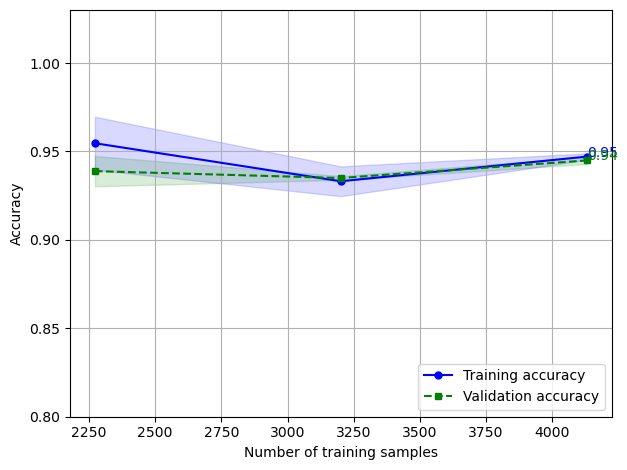

In [10]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model, X=X_train_over, y=y_train_over, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [11]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.94711
last_validation_accuracy: 0.94493
L_V_diff: 0.00218


## 하이퍼파라미터 튜닝

### 주요 파라미터 설정

#### loss='log'
로지스틱 회귀 모델을 사용하여 이진 분류

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

'''
max_iter=10000 : 계산에 사용할 작업 수 
tol=1e-5 : 반복학습이 진행될 때 마다 loss값이 산출 => 이 loss값이 값이 줄어야함. loss값이 tol값보다 작으면 학습중단!
'''

sgd_model_log = SGDClassifier(random_state=42, loss='log_loss', max_iter=10000, tol=0.001) 


sgd_model_log.fit(X_train_over, y_train_over)
y_pred = sgd_model_log.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9425124201561391
f1-score: 0.891566265060241
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1043
           1       0.87      0.91      0.89       366

    accuracy                           0.94      1409
   macro avg       0.92      0.93      0.93      1409
weighted avg       0.94      0.94      0.94      1409



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


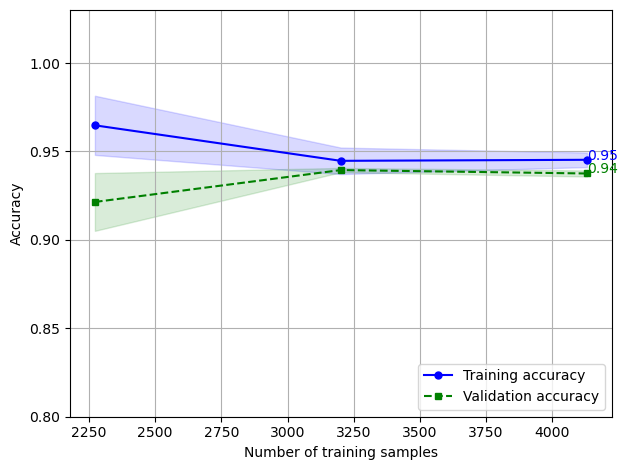

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model_log, X=X_train_over, y=y_train_over, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [23]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.94529
last_validation_accuracy: 0.93755
L_V_diff: 0.00775


#### loss='hinge'
SVM 모델을 사용하여 이진 분류를 수행

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

'''
max_iter=10000 : 계산에 사용할 작업 수 
tol=1e-5 : 반복학습이 진행될 때 마다 loss값이 산출 => 이 loss값이 값이 줄어야함. loss값이 tol값보다 작으면 학습중단!
'''

sgd_model_hinge = SGDClassifier(random_state=42, loss='hinge', max_iter=10000, tol=0.001) 


sgd_model_hinge.fit(X_train_over, y_train_over)
y_pred = sgd_model_hinge.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9481902058197303
f1-score: 0.8955650929899858
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1043
           1       0.94      0.86      0.90       366

    accuracy                           0.95      1409
   macro avg       0.95      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


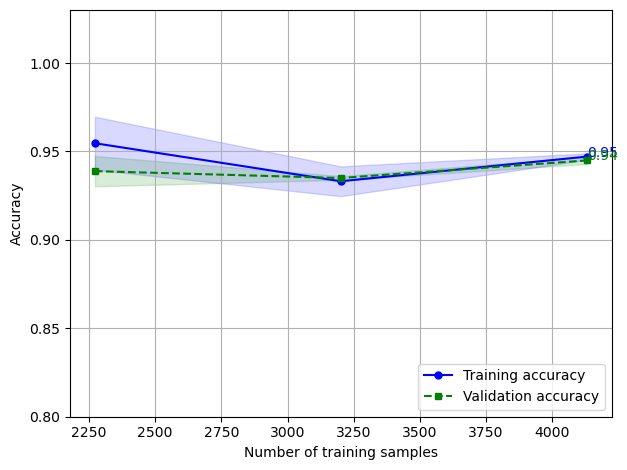

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model_hinge, X=X_train_over, y=y_train_over, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [26]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.94711
last_validation_accuracy: 0.94493
L_V_diff: 0.00218


### GridSearchCV

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# 모델 생성
sgd_model = SGDClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'loss': ['hinge', 'log_loss', 'perceptron'],  # loss 함수의 여러 옵션
    'penalty': ['l1', 'l2'],  # 정규화 옵션
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000, 10000],  # 반복 횟수
    'tol': [1e-3, 1e-4, 1e-5]  # 중단 기준(loss가 이 값보다 작아지면 중단)
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치 실행
grid_search.fit(X_train_over, y_train_over)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델 사용
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 결과 출력
print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.001}
정확도: 0.9375443577004968
f1-score: 0.8863049095607234
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1043
           1       0.84      0.94      0.89       366

    accuracy                           0.94      1409
   macro avg       0.91      0.94      0.92      1409
weighted avg       0.94      0.94      0.94      1409



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


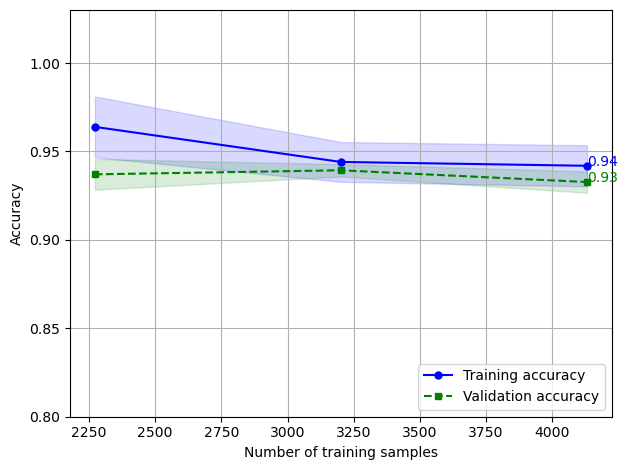

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=best_model, X=X_train_over, y=y_train_over, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [29]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.94190
last_validation_accuracy: 0.93270
L_V_diff: 0.00920


# 학습 결과

* 하이퍼파라미터 튜닝 전 (SGDClassifier(random_state=42))
 * **정확도 : 0.9481902058197303**
 * 학습곡선
     * last_train_accuracy: 0.94711
     * last_validation_accuracy: 0.94493
     * **L_V_diff: 0.00218**


* 주요 하이퍼파라미터 설정 (SGDClassifier(random_state=42, loss='log', max_iter=10000, tol=0.0001))
    * 정확도 : 0.9425124201561391
    * 학습곡선
        * last_train_accuracy: 0.94529
        * last_validation_accuracy: 0.93755
        * L_V_diff: 0.00775
        

* 주요 하이퍼파라미터 설정 (SGDClassifier(random_state=42, loss='hinge', max_iter=10000, tol=0.0001))
    * **정확도 : 0.9481902058197303**
    * 학습곡선
        * last_train_accuracy: 0.94711
        * last_validation_accuracy: 0.94493
        * **L_V_diff: 0.00218**
        
        
* GridSearchCV (Best Parameters: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1', 'tol': 0.0001})
    * 정확도 : 0.9375443577004968
    * 학습곡선
        * last_train_accuracy: 0.94190
        * last_validation_accuracy: 0.93270
        * L_V_diff: 0.00920